# Primera ejercitación de Laboratorio de Datos (1er cuatrimestre 2021)

***Fecha de entrega de consigna: 9/4/2021 en horario de clase***

***Fecha de entrega de resolución: 20/4/2021 a las 23:55 PM***

***Que hay que hacer***: Más abajo hay una serie de consignas ("pasos") que gradualmente guían al objetivo de la ejercitación. Cada paso tiene además una ayuda. Hay que ir haciendo lo que pedimos en esos pasos hasta completar la ejercitación.

***Cómo hay que hacerlo***: Cada alumno tiene que crear y compartir un notebook individual con la resolución, el cual se llame "Ejercitacion 1" seguido de su nombre y apellido. En el campus virtual compartimos instrucciones para la entrega de ejercicios. El notebook tiene que contener código que al ejecutarse haga lo que pedimos, y texto comentando lo que ustedes consideren necesario para que nosotros entendamos lo que hicieron.

***Qué pasa después***: Nosotros evaluamos los notebooks de cada uno y los tenemos en cuenta para calcular la nota final. El día siguiente a la fecha límite de entrega, publicamos un notebook junto con nuestra resolución de la ejecitación para que puedan comparar con lo que ustedes hicieron.

***Qué hago si no me sale***: Consultarnos las dudas que tengan en el foro de la materia que se encuentra en el campus virtual.

***RECUERDEN QUE ES OBLIGATORIO ENTREGAR UN NOTEBOOK PARA CONTINUAR CON LA MATERIA***




---

# Consigna


En la segunda clase de la materia mencionamos brevemente el modelo OCEAN de la personalidad, también conocido como "Big 5" (los cinco grandes). Este modelo se basa en hacer una serie de preguntas y luego separar las respuestas en dominios o dimensiones diferentes, de acuerdo a las correlaciones que existen en las respuestas. Este procedimiento se repite muchas veces en distintas poblaciones de sujetos, hasta que se encuentra el mínimo número de dimensiones que sirven para reproducir aceptablemente los datos. Luego, a partir de las preguntas que se asocian a cada una de las dimensiones, se interpreta lo que significa cada una de ellas en términos que sean intuitivos para lo que nosotros entendemos como personalidad.

Las primeras cuatro dimensiones de personalidad que fueron aceptadas son las siguientes:

1.   **Agradabilidad**. Una medida del comportamiento pro-social de los individuos y de su actitud empática y preocupación por los demás.
2.  **Extroversión**. Grado de comportamiento social. Los individuos con valores altos de esta dimensión suelen ser energéticas y positivas.
3.   **Responsabilidad**. Capacidad para cumplir objetivos y tareas y mantener la prolijidad y el orden.
5.   **Neuroticismo**. Personas con valores altos en esta dimensión suelen preocuparse fácilmente por cosas y sufrir de ansiedad y de pensamientos negativos.

Resulta ser que estas cuatro dimensiones no parecen ser suficientes para describir adecuadamente la personalidad humana: es necesario agregar una nueva dimensión, la cual es comparativamente menos importante a la hora de reproducir los datos, pero no por eso deja de ser necesaria. La dimensión faltante es algo más abstracta y difícil de interpretar que las anteriores. En las etapas tempranas del modelo OCEAN, los investigadores se dieron cuenta de que aquellas personas con valores altos de esta quinta dimensión eran más propensas a haber consumido marihuana u otras drogas en los campus universitarios de Estados Unidos, y por lo tanto que eran más abiertas a tener experiencias con drogas. Este es precisamente el motivo por el cual se denominó a esta quinta dimensión "**apertura a la experiencia**" (o más sucintamente, "apertura").

Las personas con valores altos de apertura tienden a desear nuevas experiencias y a tomar más riesgos para tenerlas, además suelen ser personas más creativas e intuitivas. La variable apertura se relaciona con posiciones políticas (aquellos con valores altos de apertura tienden a tener ideología liberal) y a tener mayor grado auto-reportado de felicidad y de pensamientos positivos. Además, la dimensión apertura se relaciona con la disponibilidad del neurotransmisor serotonina en el cerebro, es altamente heredable, y hasta afecta la percepción conciente del mundo, por ejemplo, las personas con valores altos de apertura tienen menos dificultad para percibir de forma simultánea estímulos que son mutuamente contradictorios:

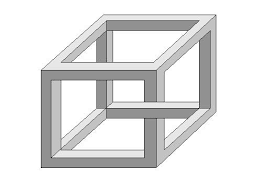


---


En esta ejercitación vamos a investigar la relación que existe entre personalidad y consumo de sustancias. Para eso vamos a necesitar los datasets de OCEAN y Coronadelicos, con los siguientes paths:






In [ ]:
# path OCEAN
filename = '/content/drive/My Drive/LaboDatos2021/ocean_safe.csv' 
# path Coronadelicos
filename = '/content/drive/My Drive/LaboDatos2021/coronadelicos_safe.csv' 

**Primer paso**: Cargar ambos dataframes por separado y unirlos en un único dataframe usando la columna "hash" y descartando sujetos que no participaron de ambos experimentos.

**Ayuda**: Vimos como hacer esto en el tercer notebook de la segunda clase.

**Segundo paso**: Armar tres dataframes distintos basado en los siguientes criterios:

*   Sujetos que reportaron haber consumido marihuana al menos una vez.
*   Sujetos que nunca consumieron marihuana.
*   Sujetos que reportaron haber consumido sedativos y/o antidepresivos o antipsicóticos.

**Ayuda**: En estas columnas, -999 significa que la persona no consumió la droga en cuestión, cualquier otro valor indica que sí lo hizo. 

Las columnas son las siguientes:

```
'7_marihuana', '7_sedativos', '7_antidepresivos o antipsicoticos'
```

Primero construir índices booleanos y luego usarlos para armar los nuevos dataframe que cumplan con las condiciones. Recordar que para aplicar operaciones lógicas entre series de Pandas hay que hacer:

```
indice = (df[col]==val1) & (df[col] == val2)   #  idem con | para "or"
```

O bien, con las funciones de numpy:

```
indice = np.logical_and(df[col]==val1,df[col]==val2)  #  idem con np.logical_or para "or"
```







**Tercer paso**: Armar nuevos dataframes que contengan columnas para las 5 dimensiones de la personalidad.

**Ayuda**: La lista de columnas que necesitamos es la siguiente:


```
columnas = ['1_extraversion', '1_agreeableness', '1_conscientiousness', '1_neuroticism', '1_openness']
```
Para armar un nuevo dataframe en base a un subconjunto de columnas de un dataframe existente, podemos hacer:

```
df_2 = df_1[columnas].copy()   #   columnas es una lista con los nombres de las columnas
```





**Cuarto paso**: Armar un radar plot donde las 5 dimensiones sean O,C,E,A,N y se muestren en distintos colores los valores promedios de cada dimension para cada grupo.

**Ayuda**: Podemos usar el siguiente código que Tomás compartió en su Notebook de la clase de visualización:

In [ ]:
def radar_plot(df, title = '',):
    categories = df.columns
    N = len(categories)
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]
     
    # Initialise the spider plot
    fig, ax = plt.subplots(figsize = (6,6), subplot_kw = {'projection': 'polar'})
     
    # If you want the first axis to be on top:
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
     
    # Draw one axe per variable + add labels labels yet
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories,
                       fontsize = 12)
     
    # Draw ylabels
    ax.set_rlabel_position(0)
    ax.set_yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
    ax.set_yticklabels(["0.1","0.2","0.3","0.4","0.5","0.6", "0.7", "0.8", "0.9", "1"],
                       color = "darkgrey",
                       size = 7)
    ax.set_ylim(0,1)
    
    # ------- PART 2: Add plots
    
    # Plot each individual = each line of the data
    
    for row in df.iloc:
            values = row.values.flatten().tolist()
            values += values[:1]
            ax.plot(angles, values, linewidth=1.5, linestyle = 'solid', label = row.name)
            ax.fill(angles, values, 'b', alpha=0.1)
    # Add legend
    ax.legend(loc=(-0.2,-0.3),fontsize=12)
    ax.set_title(title, position=(.5, 1.2),fontsize=15,)

(este código es ligeramente distinto al que compartió Tomás, así que usar este)

El input del código es un dataframe que tiene en sus columnas las 5 dimensiones de personalidad, y en 3 filas distintas los valores promedios para los tres grupos de sujetos. Además, el índice del dataframe tiene que tener los nombres de los tres grupos de sujetos, por ejemplo, 'Marihuana', 'No marihuana', 'Drogas de prescripción'.

Es importante que todos los números estén entre 0 y 1. Podemos lograrlo, por ejemplo, dividiendo por el valor más grande del dataframe.

Recordemos que vimos como armar dataframes y trabajar con ellos en la segunda clase de la materia (tercer notebook de Google Colab).


1.   ¿Cuáles son las diferencias entre el grupo de consumidores vs. no consumidores? ¿Vemos la única diferencia en la variable apertura, o hay otras diferencias aparentes?
2.   ¿Cuáles son las diferencias entre estos grupos y el grupo de personas que han reportado consumo de sedativos y/o sedativos o antipsicóticos?



**Quinto paso**: Elijamos dos diferencias aparentes que existan entre grupos. Para cada una de ellas, utilizar Seaborn para graficar las distribuciones correspondientes.

**Ayuda**: Primero necesitamos crear una columna que tenga un valor constante para cada uno de los dataframes. Por ejemplo, podemos armar una columna que se llame "grupo" en cada uno de los dataframes, y que tenga el valor constante "Marihuana", "No marihuana", "Drogas de prescripcion" dependiendo del grupo (por ejemplo).

Luego, elegir los dos dataframes correspondientes a los grupos que queremos comparar y concatenarlos (podemos usar el método "append", vimos esto en la segunda clase de la materia). Finalmente podemos usar la función de Seaborn llamada histplot para hacer el plot de los histogramas:

```
sns.histplot(data=df, x=dimension de personalidad, hue=columna con el nombre de grupo, stat="probability")
```



Vemos que los valores están distribuidos con valores medios más o menos diferentes. En estadísica se utilizan los tests de hipótesis para estimar la probabilidad de rechazar la hipótesis de que las medias entre grupos son idénticas (de ahí vienen los famosos p-valores). Nosotros no vamos a ver esto en la materia, pero sí podemos estimar la magnitud de la diferencia calculando la separación entre las distribuciones normales. 

Esto puede hacerse mediante la D de Cohen, que se computa como muestra el siguiente esquema:

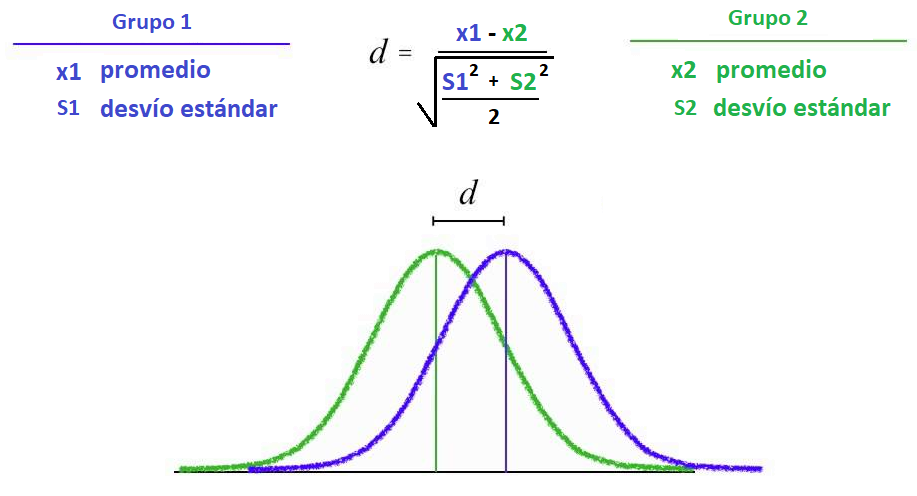


**Sexto paso**: Calcular el tamaño de efecto de la diferencia entre la dimensión de personalidad y los grupos elegidos usando la D de Cohen. 
¿Qué tan grande es la magnitud de la diferencia entre grupos?

**Ayuda**: Implementemos una función para calcular la D de Cohen en base a lo que vimos en el último notebook sobre estadística descriptiva. 

La magnitud del efecto se estima mediante una tablita como la siguiente:

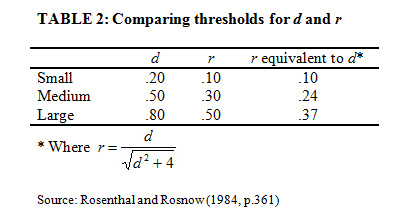

Por ejemplo, una d cercana a 0.20 se considera un efecto de magnitud pequeña, cercana a 0.50 un efecto de magnitud media, y así sucesivamente. Notar que la d puede tener signo, el cual indica la dirección del efecto, pero para su magnitud únicamente nos interesa el valor absoluto.
